### Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

## Information from image , just for understanding the dataset

#### Source of image 1: https://my.clevelandclinic.org/health/diseases/21489-angina

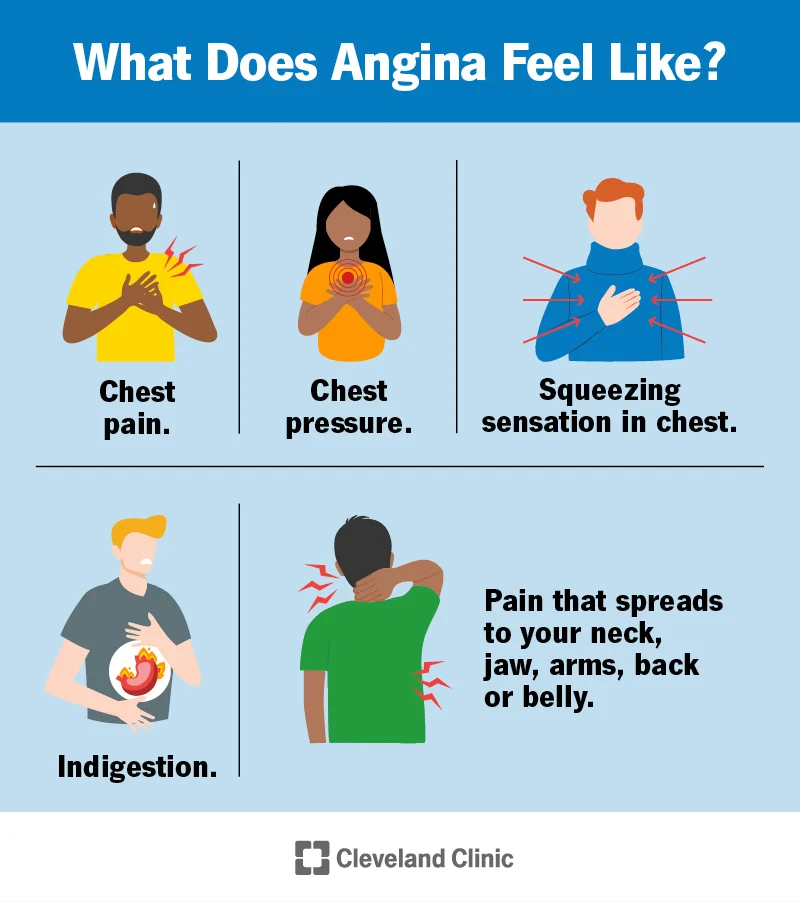

#### Source of image 2: https://theheartfoundation.org/2018/10/05/blood-pressure/

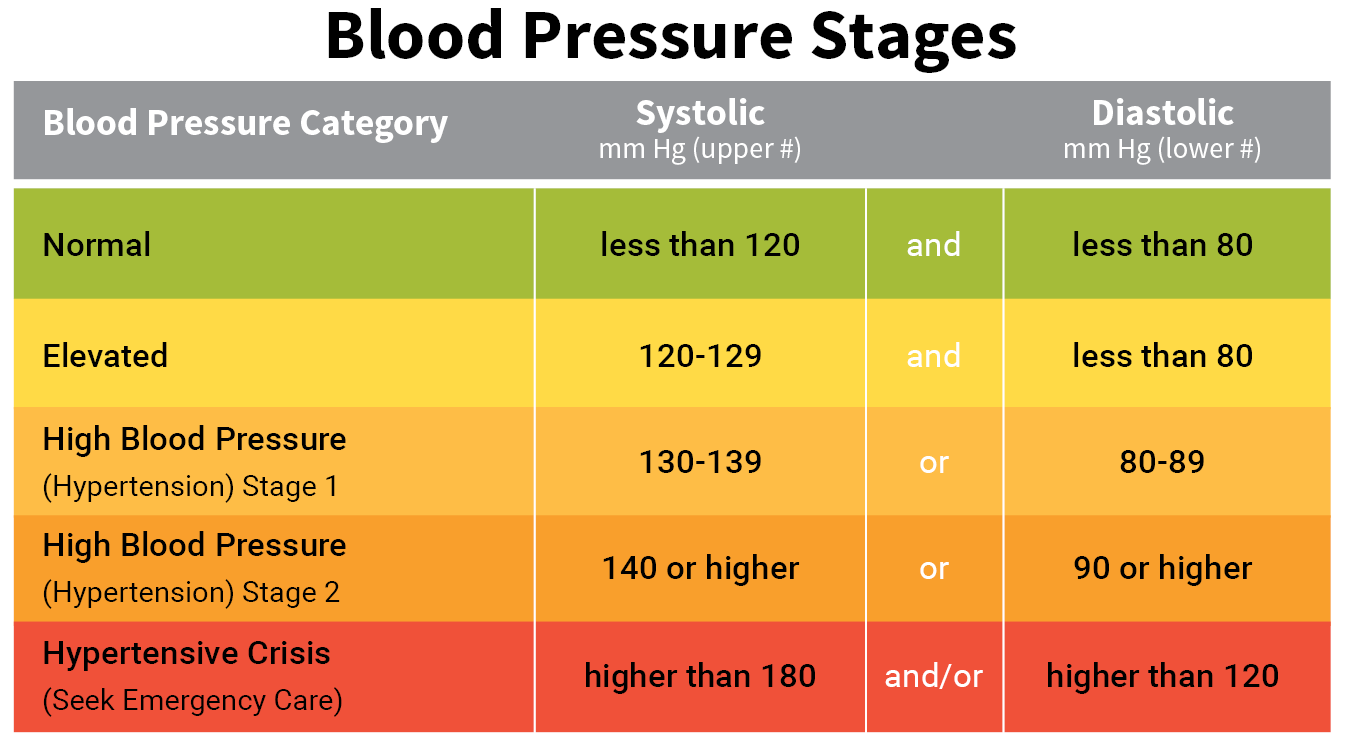

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Intution and Cleaning

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df['FastingBS'].unique()

array([0, 1])

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### All object or string columns

In [7]:
object_cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

#### Statistical Information about data

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Checking for null values

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Checking for duplicate values

In [10]:
df.duplicated().sum()

0

## EDA: Exploratory Data Analysis

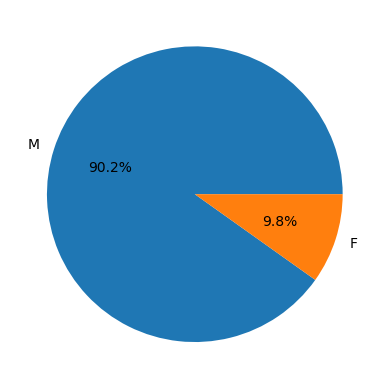

In [11]:
# Lets check the gender wise heart attack rate
plt.pie(x=df[df['HeartDisease']==1]['Sex'].value_counts(),labels=['M','F'],autopct='%1.1f%%')
plt.show()

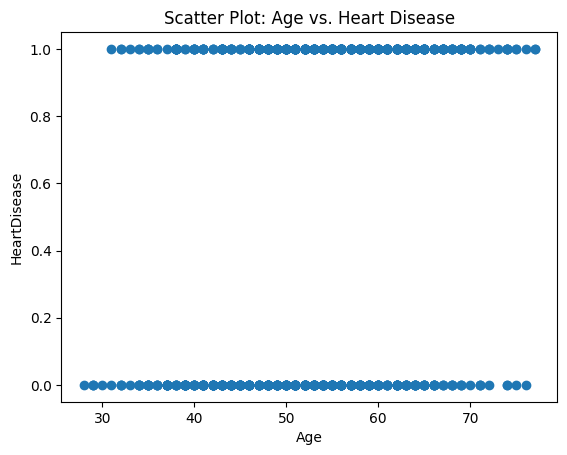

In [12]:
plt.scatter(df['Age'], df['HeartDisease'])
plt.xlabel('Age')
plt.ylabel('HeartDisease')
plt.title('Scatter Plot: Age vs. Heart Disease')
plt.show()

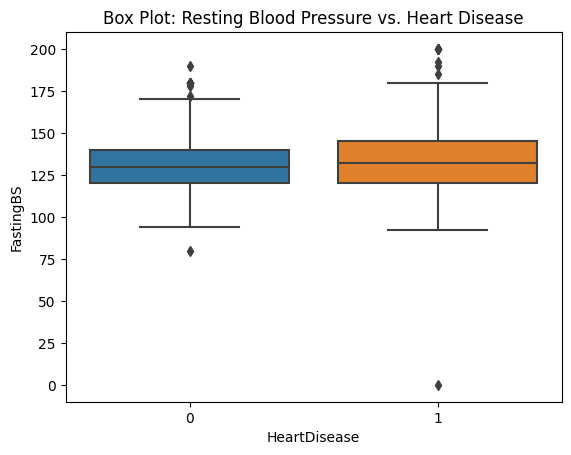

In [13]:
sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.xlabel('HeartDisease')
plt.ylabel('FastingBS')
plt.title('Box Plot: Resting Blood Pressure vs. Heart Disease')
plt.show()

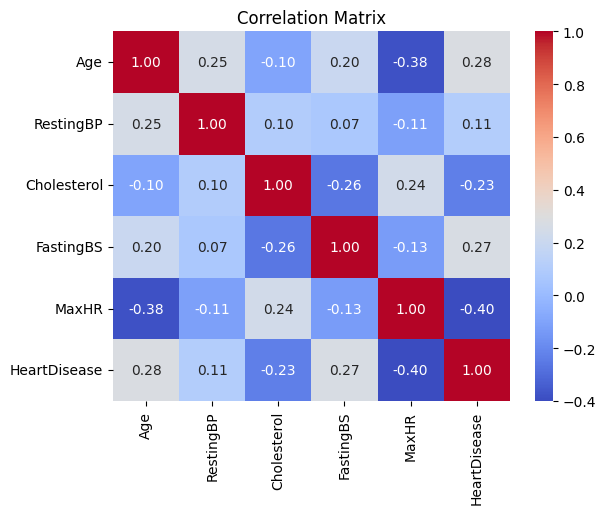

In [14]:
correlation_matrix = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


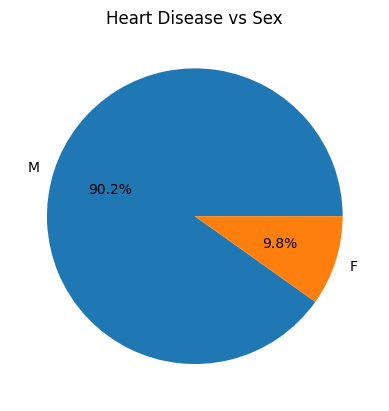

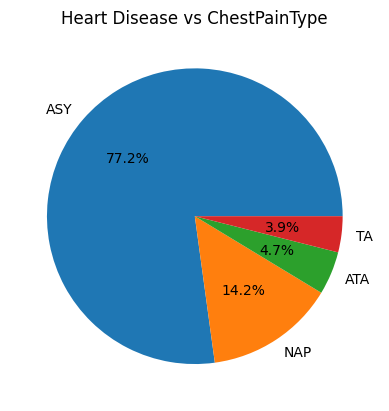

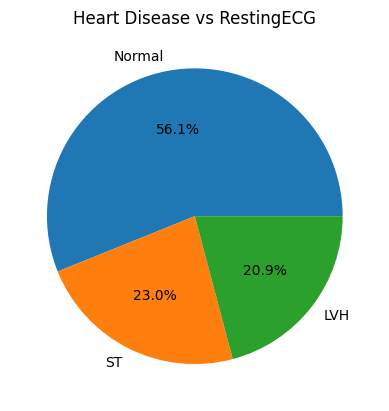

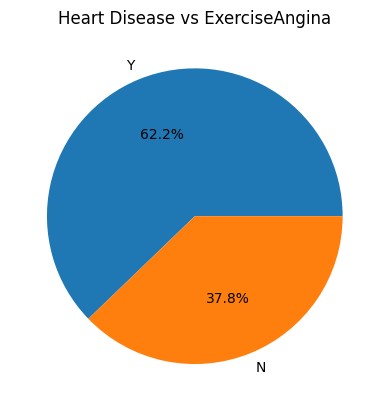

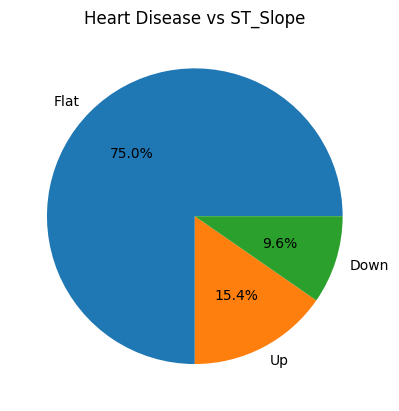

In [15]:
for obj in object_cols:
  # Lets check the gender wise heart attack rate
  plt.pie(x=df[df['HeartDisease']==1][obj].value_counts(),labels=df[df['HeartDisease']==1][obj].value_counts().index,autopct='%1.1f%%')
  plt.title(f'Heart Disease vs {obj}')
  plt.show()

#### Removing the outliers (Skipped)
#### Reason for not removing the outliers in this dataset are following
1. Dataset is already small
2. Outliers are conveying information and contributing in model development
3. Take an example of "FastingBS" feature if you remove the outliers it will have a minimum contribution , but this is not the case in actual world

In [16]:
# numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR']
# for column in numerical_columns:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#### Converting the categorical columns to Numerical columns

In [17]:
for col in object_cols:
  n=len(df[col].unique())
  values=df[col].unique()
  for i in range(n):
    df[col].replace({values[i]:i},inplace=True)

In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [19]:
df['FastingBS'].unique()

array([0, 1])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


#### Spliting the training and testing dataset

In [21]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
from sklearn.model_selection import train_test_split

#### Scaling the dataset between 0 and 1

In [24]:
scaler=MinMaxScaler()

#### Train test split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.8)

In [26]:
x_train_t=scaler.fit_transform(x_train)

In [27]:
x_test_t=scaler.transform(x_test)

In [28]:
x_train.shape,x_test.shape

((734, 11), (184, 11))

#### Now lets implement the different algorithms

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [31]:
algos={
    'SVC':svc,
    'KNC':knc,
    'LR':lr,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'XGB':xgb,
    'BC':bc,
    'ETC':etc
}

#### Importing metrics for model evaluation

In [36]:
from sklearn.metrics import accuracy_score,classification_report,precision_score

#### Printing different metrics , how each algorithm performs on data

In [37]:
prec_acc={}
for name , algo in algos.items():
  algo.fit(x_train,y_train)
  ypred=algo.predict(x_test)
  prec_acc[name]={
                      'Precision':precision_score(y_test,ypred),
                      'Accuracy': accuracy_score(y_test,ypred)
                 }
  print(f'For {name}: {classification_report(y_test,ypred)}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.58      1.00      0.74       107

    accuracy                           0.58       184
   macro avg       0.29      0.50      0.37       184
weighted avg       0.34      0.58      0.43       184

For KNC:               precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184

For LR:               precision    recall  f1-score   support

           0       0.78      0.83      0.81        77
           1       0.87      0.83      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83     

In [34]:
prec_acc

{'SVC': {'Precision': 0.5815217391304348, 'Accuracy': 0.5815217391304348},
 'KNC': {'Precision': 0.7731958762886598, 'Accuracy': 0.7065217391304348},
 'LR': {'Precision': 0.8725490196078431, 'Accuracy': 0.8315217391304348},
 'DTC': {'Precision': 0.91, 'Accuracy': 0.8641304347826086},
 'RFC': {'Precision': 0.8846153846153846, 'Accuracy': 0.8532608695652174},
 'ABC': {'Precision': 0.91, 'Accuracy': 0.8641304347826086},
 'XGB': {'Precision': 0.8867924528301887, 'Accuracy': 0.8641304347826086},
 'BC': {'Precision': 0.900990099009901, 'Accuracy': 0.8586956521739131},
 'ETC': {'Precision': 0.8952380952380953, 'Accuracy': 0.8695652173913043}}

# Note:
#### we can see from the above result the from all algorithms AdaBoost and Decision Tree as performing equally well so we will go with AdaBoost

In [39]:
print(classification_report(y_test,abc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

